<a href="https://colab.research.google.com/github/aditivin16/AI_Club_RLGames/blob/main/aditi_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DQN implimentation on cartpole
import gym
import torch
import torch.nn as nn
import random
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time


env=gym.make('CartPole-v1')
nstates=env.observation_space.shape[0] #number of input neurons required to define the current state
nactions=env.action_space.n #number of possbile actions at each state

#hyperparameters
learning_rate=0.01
gamma=0.999
epsilon=1
epsilon_decay_rate=0.99
epsilon_min=0.001
target_step=30 #target network weights updated every 30 steps
batch_size=20 #20 samples taken from experience replay each time
step=[]
yaxis=[]

#creating the network

network=nn.Sequential(nn.Linear(nstates, 20),nn.ReLU(),nn.Linear(20,20),nn.ReLU(),nn.Linear(20,nactions))
#here we have a 3 layer neural network, hiddn layer with 20 neurons
#number of neurons in input layer are number of states
#number of neurons in output layer are number of possible actions at each state
#applying ReLU activation to each layer
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
loss_function= nn.MSELoss()

#creating the target network

target_network=nn.Sequential(nn.Linear(nstates, 20),nn.ReLU(),nn.Linear(20,20),nn.ReLU(),nn.Linear(20,nactions))
target_network.load_state_dict(network.state_dict()) #copies state dictionary (containing weights and biases) from network to target_network
target_network.eval() #setting target net to evaluation mode siince we do not want to train it

#defining memory replay
memory=[]
reward_array=[]


#training loop
n_episodes=1000
for episode in range(n_episodes):
  state=env.reset()
  done=False
  net_reward=0

  while not done:
    #episilon-greedy exploration of environment
    if np.random.random()<epsilon: #if the random number generated is less than epsilon, choose a random action
      action=env.action_space.sample()
    else:
      with torch.no_grad():
                q_values = network(torch.tensor(state, dtype=torch.float32)) #the state is passed through the Q-network (network) to obtain the predicted Q-values for all possible actions. The state is converted to a PyTorch tensor of type torch.float32 to match the data type expected by the network.
                action = torch.argmax(q_values).item()
    next_state, reward, done, info = env.step(action)
    if not done:
      reward=1
    else:
      reward=-100
    net_reward+=reward
    #yaxis.append(reward)
    #step.append(episode)
    #clear_output(wait=True)
    #plt.figure(figsize=(5, 5))
   # plt.xlim(-4, 4)
   #plt.ylim(0, 2)
   # plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)
   # plt.plot([next_state[0], next_state[0] + np.sin(next_state[2])], [0.5, 1.5], 'r', linewidth=3)
   # plt.plot(next_state[0], 0.5, 'bo', markersize=10)
   # plt.title(f'CartPole Episode: {episode + 1} | Step: {env._elapsed_steps}')
   # plt.show()

    #storing in experience replay
    memory.append((state, action, reward, next_state, done))

    #updating the q-network
    if len(memory)>batch_size:
      batch = random.sample(memory, batch_size)
      state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch) #unzipping batch sample and assigning to each variable respectively
      state_batch = torch.tensor(state_batch, dtype=torch.float32) #converting each sample to tensor of dtype float32
      action_batch = torch.tensor(action_batch, dtype=torch.int64)
      reward_batch = torch.tensor(reward_batch, dtype=torch.float32)
      next_state_batch = torch.tensor(next_state_batch, dtype=torch.float32)
      done_batch = torch.tensor(done_batch, dtype=torch.float32)
      q_values=network(state_batch)
      q_values = q_values.gather(1, action_batch.unsqueeze(1)).squeeze(1)
      next_q_values = target_network(next_state_batch).max(1)[0]
      expected_q_values = reward_batch + gamma * next_q_values * (1 - done_batch)
      loss = loss_function(q_values, expected_q_values.detach())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #decaying the value of epsilon
      # Decaying value of epsilon
      epsilon =epsilon*epsilon_decay_rate
      if epsilon<epsilon_min:
        epsilon=epsilon_min

    #updating target network
    if episode%target_step==0:
      target_network.load_state_dict(network.state_dict())
    reward_array.append(net_reward)
    state=next_state
  #print("Episode:",episode+1,"/",n_episodes)
  #print("Reward:",net_reward)





#import matplotlib.pyplot as plt

#x=step
#y=reward_array
#plt.scatter(step,reward_array,label='scatter',color='green')
#plt.show()
#z = np.polyfit(x, y, 2)
#p = np.poly1d(z)
#add trendline to plot
#plt.plot(x, p(x),label='trend')
#plt.legend()














/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# **GRAPH**

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -89, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -82, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, -55, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -84, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -82, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -88, 1, 2, 3, 4, 5, 6, 7, 8, 9, -91, 1, 2, 3, 4, 5, 6, 7, -93, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -90, 1, 2, 3, 4, 5, 6, 7, 8, 9, -91, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, -79, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -86, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -89, 1, 2, 3, 4, 5, 6, 7, 8, -92, 1, 2, 3, 4, 5, 6, 7, 8, -92, 1, 2, 3, 4, 5, 6, 7, 8, 9, -91, 1, 2, 3, 4, 5, 6, 7, 8, -92, 1, 2, 3, 4, 5, 6, 7, 8, -92, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -90, 1, 2, 3, 4, 5, 6, 7, 8, -92, 1, 2, 3, 4, 5, 6, 7, 8, 9, -91, 

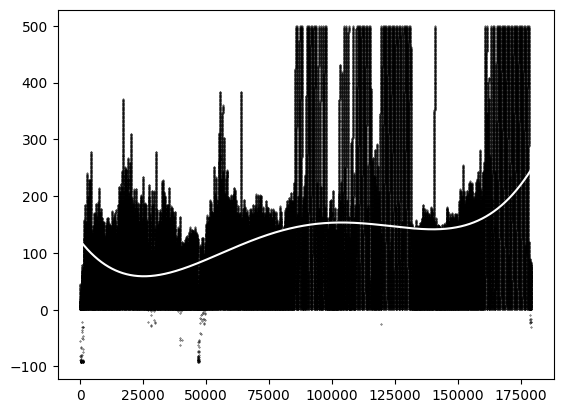

In [ ]:
import matplotlib.pyplot as plt

y=reward_array
print(y)
x=[i+1 for i in range(len(y))]
plt.scatter(x,y,color='black',s=0.1)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
#add trendline to plot
plt.plot(x, p(x),color='white')
plt.show()


